
## Bike Sharing Demand Case Study

#### Problem Statement:

BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19.they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.

- How well those variables describe the bike demands


## Step 1: Reading and Understanding the Data

First import NumPy and Pandas and read the  dataset

In [5]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [6]:
import numpy as np
import pandas as pd

In [8]:
df = pd.read_csv("day.csv")

In [9]:
# Check the head of the dataset
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


1. **Inspect the various aspects of the days dataframe**

In [10]:
#checking the shape of  the imported file
print("The day data shape", df.shape)

The day data shape (730, 16)


In [11]:
df.info(verbose= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [12]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


**2. Data Quality Checks and handling missing values**

In [13]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

***Thus, the above analysis clearly indicates that there are no NAN values in the dataset***

## Step 2: Visualising the Data

- Could observe some multicollinearity 
- identify if some predictors directly have a strong association with the outcome variable

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

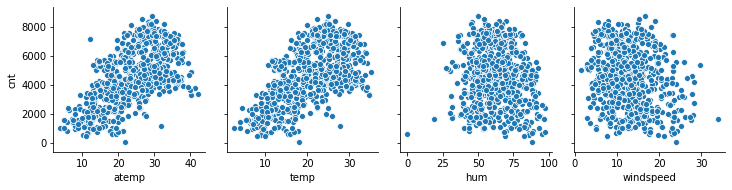

In [15]:
sns.pairplot(data=df,x_vars = ['atemp','temp', 'hum', 'windspeed'], y_vars='cnt')
plt.show()

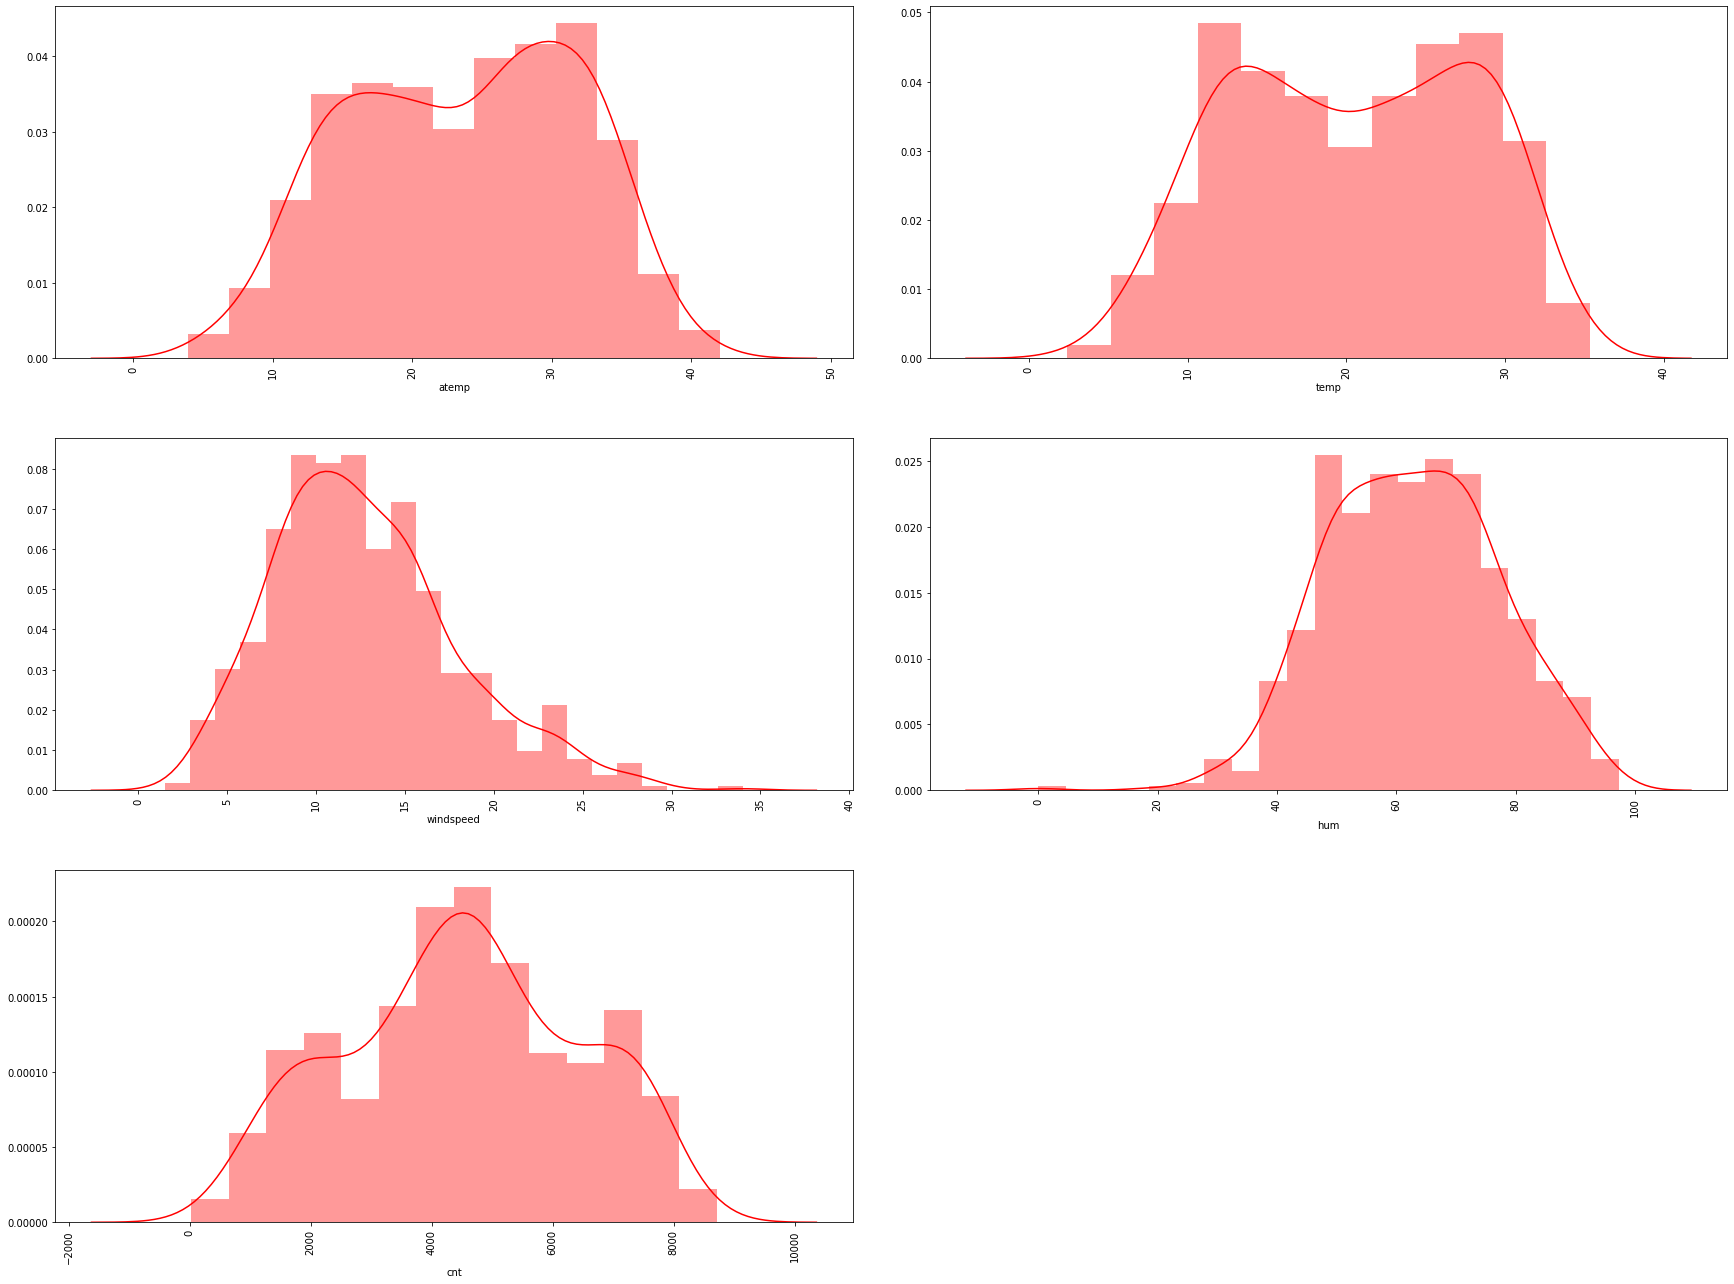

In [16]:
Continuous = ['atemp','temp','windspeed', 'hum', 'cnt']
list(enumerate(Continuous))
plt.figure(figsize=(25,30))  
for i in enumerate (Continuous):
    plt.subplot(5,2,i[0]+1)
    sns.distplot(df[i[1]], hist = True , color = 'r')
    plt.tight_layout(pad=4.0)
    plt.xticks(rotation = 90)

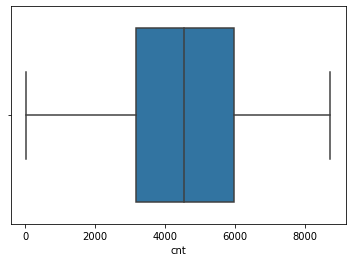

In [17]:
sns.boxplot(df.cnt)
plt.show()

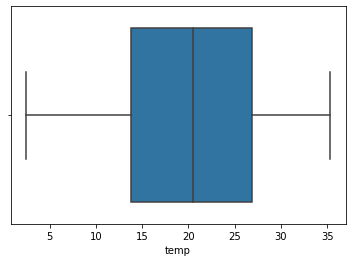

In [18]:
sns.boxplot(df.temp)
plt.show()

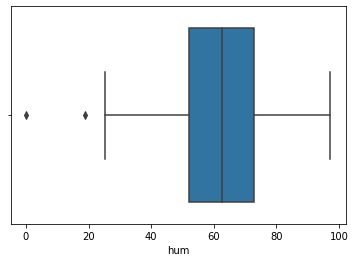

In [19]:
sns.boxplot(df.hum)
plt.show()

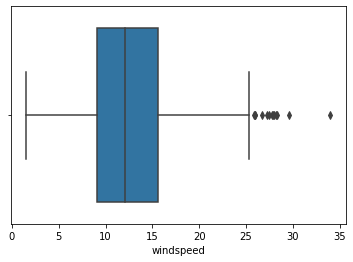

In [20]:
sns.boxplot(df.windspeed)
plt.show()

#### Visualising Categorical Variables



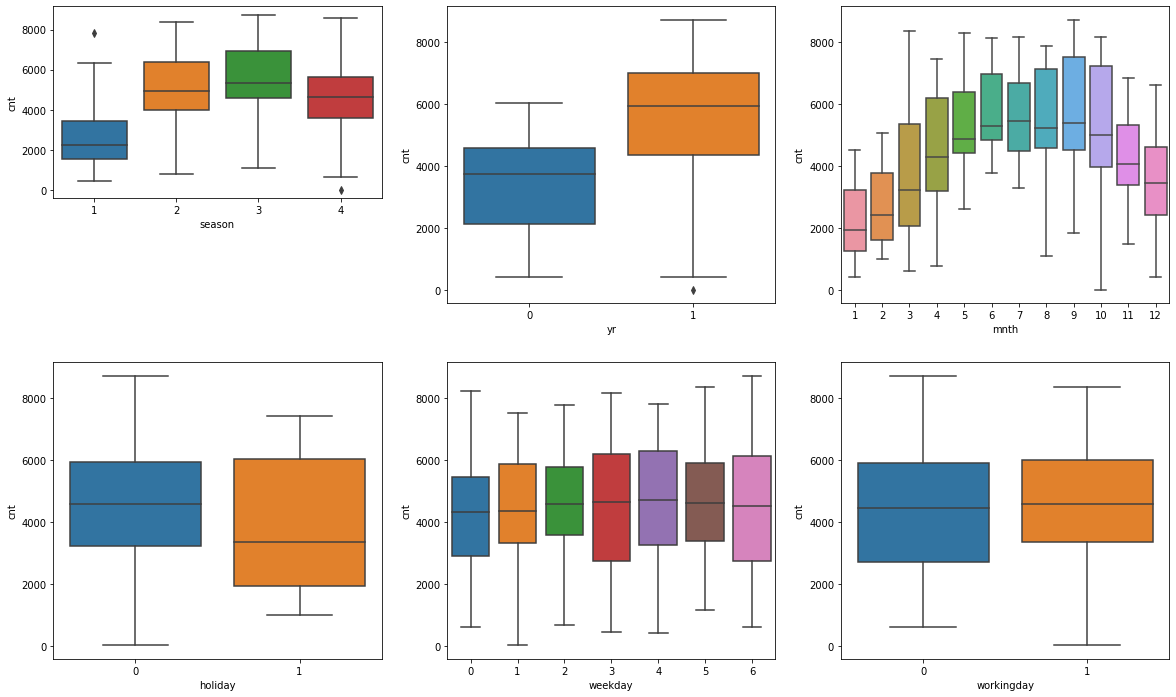

In [21]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = "cnt", data = df)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.show()


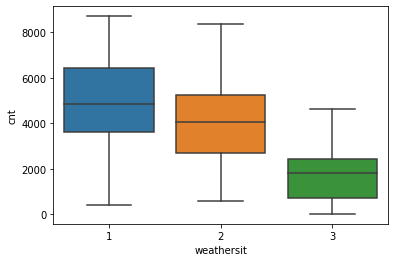

In [22]:

sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.show()

We can also visualise some of these categorical features parallely by using the `hue` argument. 

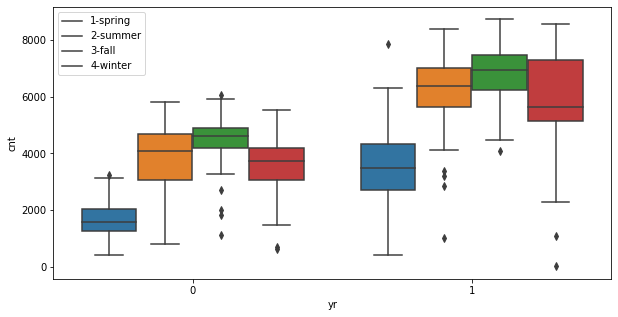

In [23]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'yr', y = 'cnt', hue = 'season', data = df)
plt.legend(['1-spring','2-summer','3-fall', '4-winter'])
plt.show()

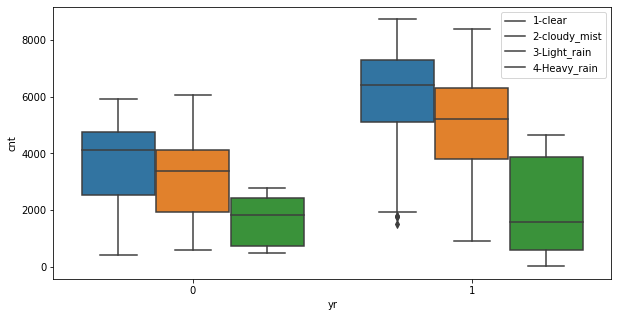

In [24]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'yr', y = 'cnt', hue = 'weathersit', data = df)
plt.legend(['1-clear','2-cloudy_mist','3-Light_rain', '4-Heavy_rain'])
plt.show()

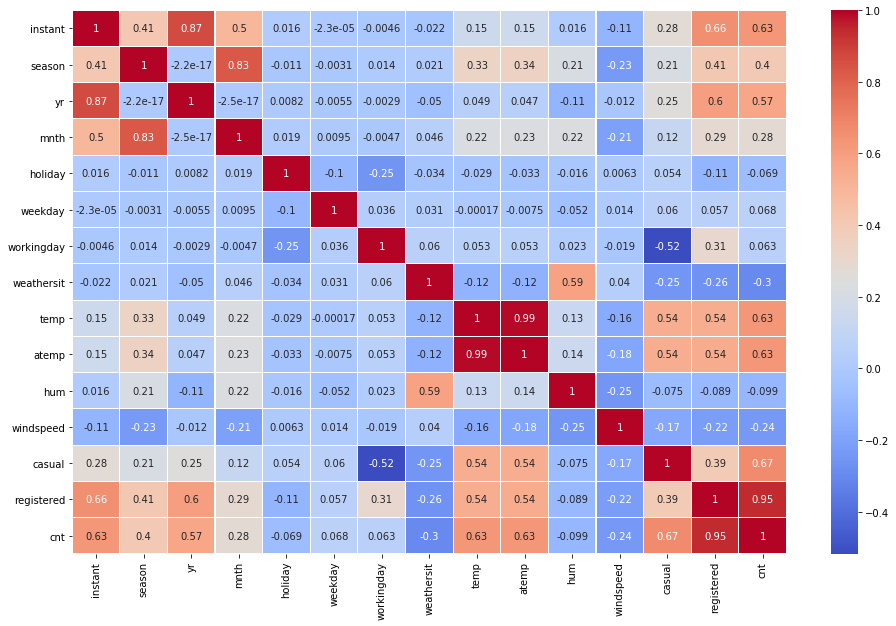

In [25]:
#  the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm', linecolor = 'white', linewidths=0.1)
plt.show()

## Important Insights from data visualization :

1. About the TARGET VARIABLE : COUNT

   a) The dependent variable is somehow normally distributed with some bumps in between .
     It is neither skewed rightwards not leftwards.
   b) Absence of outliers
   c) Highly correlated with casual and registered

Further , we can drop causal and registered variables since count is hightly correlated with Casual and Registered. It's because Count is derived from Casual and RegisteredTherefore,  We'll have to omit these variables. 

2. Temp and Atemp have perfect correlation. Therefore, we can drop either of them.

3. Categorical Variables:
   a) Season and Month :The demand of rental bikes increased in the fall season which further indicated that consumers go for rental bikes mostly in the months of June, July, August and September.
   b) Year : The demand of rental bikes were high in 2019 as compared to 2018.
   c) Holiday: Peple demanded more rental bikes during holidays
   d) Weekday: It is observed that demand for rental bikes is less during saturday, sunday and monday.
   e) Workingday : Another important insight is rather than on weekends and holidays, the demand for rental bikes is high during working days.
   f) weathersit : Demand for rental bikes is high when weather is clear and pleasant.
   
4. Numeric Variables:
   a) All the numeric variables follow normal distribution
   b) Both Hum and windspeed have few outliers (2 or 3 points) that could be taken care by the model.

5. Correlation Analysis:
   a) Correlation between dependent and independent variables :
      * Cnt and Temp : moderate to high
      * Cnt and Year : modertae to high
   b) Correlation between indepedent variables : indicative of the problem of multicollinearity
      * season and month : very high 
      * Hum and weathersit : moderate to high 
 

In [26]:
# Thus dropping irrelevent columns 
del_columns = ['atemp', 'casual','registered','instant','dteday']
df.drop(columns=del_columns,axis=1,inplace=True)
print(df.shape)

(730, 11)


## Step 3: Data Preparation

**1. Mapping the categorical variables**

In [27]:
season_string = {1:'spring',2:'summer',3:'fall', 4:'winter'}
df['season'] = df['season'].map(season_string)
df.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [28]:
mnth_string  = {1:'jan',2:'feb',3:'mar', 4:'apr',5:'may',6:'jun', 7:'jul',8:'aug',9:'sep',10 :'oct',11:'nov',12:'dec'}
df['mnth'] = df['mnth'].map(mnth_string)
df.mnth.value_counts()

may    62
jul    62
dec    62
oct    62
jan    62
mar    62
aug    62
nov    60
jun    60
apr    60
sep    60
feb    56
Name: mnth, dtype: int64

In [29]:
df['weekday']=df['weekday'].map({0:'sun',1:'mon',2:'tue',3:'wed', 4:'thu',5:'fri',6:'sat'})
df.weekday.value_counts()

sat    105
mon    105
sun    105
thu    104
fri    104
tue    104
wed    103
Name: weekday, dtype: int64

In [30]:
df['weathersit']=df['weathersit'].map({1:'clear',2:'Cloudy',3:'Light_snow_rain', 4:'Heavy_snow_rain'})
df.weathersit.value_counts()


clear              463
Cloudy             246
Light_snow_rain     21
Name: weathersit, dtype: int64

In [31]:
# Check the days dataframe now
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,43.6957,12.522300,1600


**2 Dummy Variables**

we will use something called `dummy variables`.

In [32]:
season_dummy = pd.get_dummies(df['season'],drop_first = True)
df = pd.concat([df,season_dummy], axis =1)

mnth_dummy = pd.get_dummies(df['mnth'],drop_first = True)
df = pd.concat([df,mnth_dummy], axis =1)

weekday_dummy = pd.get_dummies(df['weekday'],drop_first = True)
df = pd.concat([df,weekday_dummy], axis =1)

weathersit_dummy = pd.get_dummies(df['weathersit'],drop_first = True)
df = pd.concat([df,weathersit_dummy], axis =1)


In [33]:
# Check what the dataset  looks like
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_snow_rain,clear
0,spring,0,jan,0,sat,0,Cloudy,14.110847,80.5833,10.749882,...,0,0,0,1,0,0,0,0,0,0
1,spring,0,jan,0,sun,0,Cloudy,14.902598,69.6087,16.652113,...,0,0,0,0,1,0,0,0,0,0
2,spring,0,jan,0,mon,1,clear,8.050924,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,1
3,spring,0,jan,0,tue,1,clear,8.200000,59.0435,10.739832,...,0,0,0,0,0,0,1,0,0,1
4,spring,0,jan,0,wed,1,clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,1,0,1


In [34]:
# Drop season, mnth,weekday and weathersit  as we have created the dummies for it

df = df.drop(['season','mnth','weekday','weathersit'], axis = 1)
df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_snow_rain,clear
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,1


## Step 4: Splitting the Data into Training and Testing Sets

**1 Performing a train-test split**

In [35]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
scaler = MinMaxScaler()

In [38]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'cnt', 'hum', 'windspeed']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [39]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_snow_rain,clear
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,0,1,0,0,1
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,1
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,0,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,1
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [40]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_snow_rain,clear
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.627451
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.483958
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


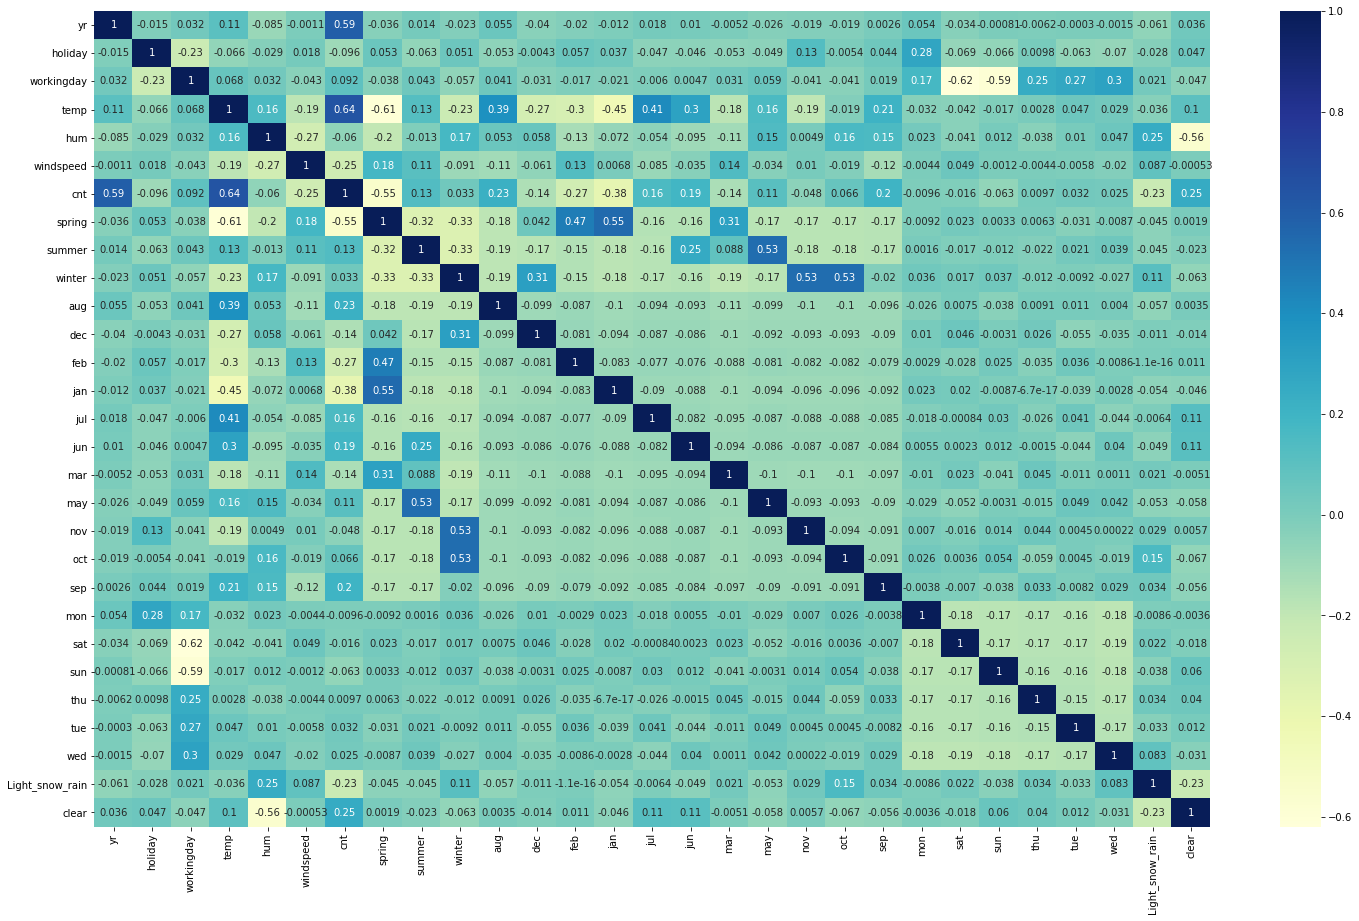

In [41]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25, 15))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### As noticed, temp ans yr seems to be correlated to `cnt` the most. Let's see a pairplot for `temp` vs `cnt`.

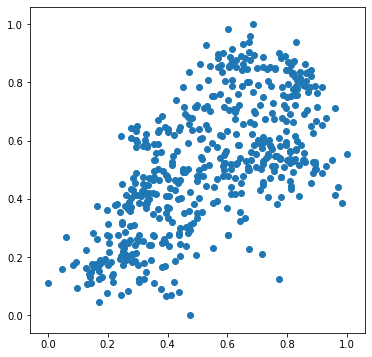

In [42]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

**2 Dividing into X and Y sets for the model building**

In [43]:
y_train = df_train.pop('cnt')
X_train = df_train

## Step 5: Building a linear model

**1.Feature Selection using RFE**

In [44]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [45]:
ln = LinearRegression()
ln.fit(X_train, y_train)
rfe = RFE(ln,15)
rfe = rfe.fit(X_train, y_train)

In [46]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 6),
 ('dec', False, 3),
 ('feb', False, 4),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', False, 13),
 ('mar', False, 14),
 ('may', False, 5),
 ('nov', False, 2),
 ('oct', False, 10),
 ('sep', True, 1),
 ('mon', False, 8),
 ('sat', True, 1),
 ('sun', False, 7),
 ('thu', False, 11),
 ('tue', False, 9),
 ('wed', False, 12),
 ('Light_snow_rain', True, 1),
 ('clear', True, 1)]

In [47]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'jan', 'jul', 'sep', 'sat', 'Light_snow_rain',
       'clear'],
      dtype='object')

In [48]:
X_train.columns[~rfe.support_]

Index(['aug', 'dec', 'feb', 'jun', 'mar', 'may', 'nov', 'oct', 'mon', 'sun',
       'thu', 'tue', 'wed'],
      dtype='object')

**2. Fitting the Model**

In [49]:
import statsmodels.api as sm


X_train_lm = X_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'jan', 'jul', 'sep', 'sat', 'Light_snow_rain',
       'clear']]
X_train_lm = sm.add_constant(X_train_lm)

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [50]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          2.31e-191
Time:                        13:06:53   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1932      0.040     

#### The R-squared value obtained is `0.849`. All the variables are sigicicant at the dignificance level of 5%. Let have a look at the VIF to check multocollinearity.

In [51]:
# calculate the VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
x = X_train_lm.drop(['const'],axis=1)
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range (x.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif=vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
4,hum,24.60
3,temp,20.45
2,workingday,5.32
6,spring,5.06
5,windspeed,4.71
8,winter,3.84
14,clear,3.47
7,summer,2.98
0,yr,2.09
12,sat,1.98


### The VIF value of 'hum' is very high (more than 5%). Lets drop this variable in the next model. 

## Updating the model : removing variable 'hum'

In [52]:
# Build a linear model

X_train_new = X_train_lm.drop(['hum'],axis=1)
X_train_new= sm.add_constant(X_train_new)
lr_1=sm.OLS(y_train, X_train_new).fit()
print (lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.3
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          7.33e-189
Time:                        13:06:53   Log-Likelihood:                 511.16
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     495   BIC:                            -928.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0910      0.032     

#### R square value is still 84% even after removing `hum` variable and all other variables are significant. Lets check VIF

In [53]:
vif = pd.DataFrame()
x = X_train_new.drop(['const'],axis=1)
vif['Features'] =x.columns
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range (x.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif=vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
3,temp,7.83
2,workingday,5.19
4,windspeed,4.70
5,spring,3.18
13,clear,2.86
6,summer,2.31
0,yr,2.08
7,winter,2.00
11,sat,1.96
8,jan,1.61


#### Although the VIF value of `temp` is very high , the correlation analysis shows that it is highly correlated with cnt. Further, it is an important factor that impact the demand of bikes. The dropping of this value reduce the r squate to 77%. Therefore, t it would be better to drop other variable that is next to `temp` in terms of VIF. 

## Updating the model by dropping variable workingday

In [54]:
X_train_lr = X_train_new.drop(['workingday'],axis=1)
X_train_lr= sm.add_constant(X_train_lr)
lr_2=sm.OLS(y_train, X_train_lr).fit()
print (lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.8
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.21e-186
Time:                        13:06:54   Log-Likelihood:                 503.12
No. Observations:                 510   AIC:                            -978.2
Df Residuals:                     496   BIC:                            -919.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1313      0.030     

### The updated model shows that R square value declined slightly. However, the removal of workingday has made the variable `sat` insignificant.

In [55]:
vif = pd.DataFrame()
x = X_train_lr.drop(['const'],axis=1)
vif['Features'] =x.columns
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range (x.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif=vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
2,temp,5.83
3,windspeed,4.66
12,clear,2.86
4,spring,2.85
5,summer,2.20
0,yr,2.08
6,winter,1.80
7,jan,1.60
8,jul,1.60
9,sep,1.33


### Since the variable `sat` becomes insignificant . lets drop this variable and run the model again.

##  Updating the model and drp the variable sat

In [56]:
X_train_re = X_train_lr.drop(['sat'],axis=1)
X_train_re= sm.add_constant(X_train_re)
lr_3=sm.OLS(y_train, X_train_re).fit()
print (lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     213.1
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          3.97e-187
Time:                        13:06:54   Log-Likelihood:                 501.48
No. Observations:                 510   AIC:                            -977.0
Df Residuals:                     497   BIC:                            -921.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1348      0.030     

### R square is still good at 83% and all variables are significant at 5% level. Lets check VIF

In [57]:
vif = pd.DataFrame()
x = X_train_re.drop(['const'],axis=1)
vif['Features'] =x.columns
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range (x.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif=vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
2,temp,5.80
3,windspeed,4.64
11,clear,2.86
4,spring,2.84
5,summer,2.20
0,yr,2.07
6,winter,1.79
7,jan,1.60
8,jul,1.60
9,sep,1.33


### Since `temp` is an important variable ,it cannot be dropped . Therefore , the model is being updated by removing  another variable  having high VIF i.e windspeed.

## Updating the model by dropping windspeed

In [58]:
X_train_me = X_train_re.drop(['windspeed'],axis=1)
X_train_me= sm.add_constant(X_train_me)
lr_4=sm.OLS(y_train, X_train_me).fit()
print (lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     213.3
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.92e-180
Time:                        13:06:54   Log-Likelihood:                 482.84
No. Observations:                 510   AIC:                            -941.7
Df Residuals:                     498   BIC:                            -890.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0795      0.030     

### The above regression analysis indicates that with the droping og windspeed variable, the variable `jan` becomes insignificant. Lets drop it.

In [59]:
vif = pd.DataFrame()
x = X_train_me.drop(['const'],axis=1)
vif['Features'] =x.columns
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range (x.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif=vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
2,temp,5.05
10,clear,2.84
3,spring,2.12
0,yr,2.07
4,summer,1.91
6,jan,1.59
7,jul,1.59
5,winter,1.58
8,sep,1.33
9,Light_snow_rain,1.10


## Updating the model by dropping variable `jan`

In [60]:
X_train_mr = X_train_me.drop(['jan'],axis=1)
X_train_mr= sm.add_constant(X_train_mr)
lr_5=sm.OLS(y_train, X_train_mr).fit()
print (lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     234.1
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          2.80e-181
Time:                        13:06:54   Log-Likelihood:                 481.98
No. Observations:                 510   AIC:                            -942.0
Df Residuals:                     499   BIC:                            -895.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0704      0.029     

In [61]:
vif = pd.DataFrame()
x = X_train_mr.drop(['const'],axis=1)
vif['Features'] =x.columns
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range (x.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif=vif.sort_values(by = 'VIF',ascending = False)
vif


,Features,VIF
2,temp,5.01
9,clear,2.84
0,yr,2.07
4,summer,1.90
6,jul,1.59
5,winter,1.58
3,spring,1.48
7,sep,1.33
8,Light_snow_rain,1.10
1,holiday,1.04


### Thus, this model is the final model where all variables are significant at 5% level with 82% R square. The most important variables explaining the variation in cnt variable are :

1. Temperature : The coefficient is positive  i.e 0.50 which indicates that with the increase in temperature the bike rentals demand increases. Therefore, the company should try to target more customers during high temperature.
2. Year : the coefficient is 0.23, which means that  in 2019 the demand for bike rentals rises when compared to 2018. Therefore, the company should focus on the trends that took place in 2019 which elevated the bike rental demand.
3. Light_snow_rain : In this case the coefficient is -0.22, which means the demand for bikes fall by 0.22 units during light snow and rainy season.


Further the VIF value of all variables  are alomst less than 5%. 

R square is 82% which means that 82% variation in dependent variable(cnt) is expalined by our model



***Thus, this is the FINAL MODEL***

***Now as you can see, the VIFs and p-values both are within an acceptable range (less than 5). So we go ahead and make our predictions using this model only.***

## Step 6: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [62]:
y_train_pred = lr_5.predict(X_train_mr)

Text(0.5, 0, 'Errors')

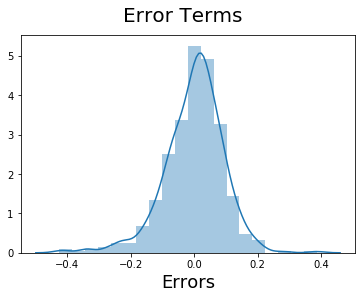

In [63]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)                       

### The residual analysis shows that the error terms follow normal distribution.

## Step 7: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fifth model.

#### 1.Applying the scaling on the test sets

In [64]:
num_vars = ['temp', 'cnt', 'hum', 'windspeed']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [65]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,oct,sep,mon,sat,sun,thu,tue,wed,Light_snow_rain,clear
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,...,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.652968
std,0.500722,0.188034,0.459904,0.233698,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,...,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.477117
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 2 Dividing into X_test and y_test

In [66]:
y_test = df_test.pop('cnt')
X_test = df_test

In [67]:
X_test_new = X_test.drop(['aug', 'dec', 'feb', 'jun', 'mar', 'may', 'nov', 'oct', 'mon', 'sun',
       'thu', 'tue', 'wed','hum','workingday','windspeed','jan','sat'], axis = 1)
X_test_new = sm.add_constant(X_test_new)
y_test_pred = lr_5.predict(X_test_new)
                         

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_test_pred')

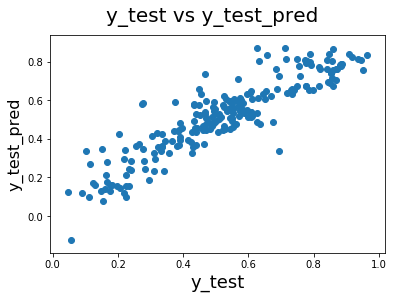

In [68]:
# Plotting y_test and y_pred to understand the spread

# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)     

In [69]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score( y_test ,y_test_pred)

0.8089780460935855

***TRAINING SET R SQUARE: 82.4***  and 
***TESTING SET R SQUARE : 80.8***

In [70]:
mse = mean_squared_error(y_test, y_test_pred)
mse


0.009072742075231337

The model is getting a mean square error of 0.01 which means the model is not able to match 1% of the
values only, which is good.
The r square value is about 80% which means our model is able to explain 80% of the variance which is also
good.
Overall your model is very good.